In [1]:
from __future__ import print_function
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import argparse
import random as rng
import math

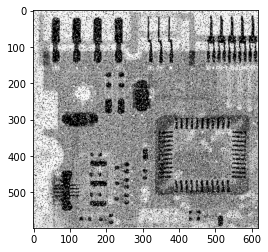

In [2]:
# Importing the image
img = cv2.imread('D:/Education/_Masters/3rd Semester - Spring 2021/Introduction to Robot Vision System/Assignment 3/paperPhoto2.bmp', cv2.COLOR_BGR2GRAY)
plt.imshow(img)

# Reduction of channels
image = img[:, :, 0]

# Visualizing the image

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.show(block=True)

In [3]:
print(image.shape)

(598, 619)


In [4]:
def findMiddle(input_list):
    middle = float(len(input_list))/2
    if middle % 2 != 0:
        return input_list[int(middle - .5)]
    else:
        return (input_list[int(middle)], input_list[int(middle-1)])

In [5]:
def med_filter5(image):
    
    new_image = image.copy()
    
    for i in range(1, image.shape[0]-3):
        for j in range(1, image.shape[1]-3):
            
            win = []
            
            for i_inside in range(i-1, i+4):
                for j_inside in range(j-1, j+4):
                    win.append(image[i_inside, j_inside])
                    
                    sorted_win = np.sort(win)
                    
                    value = findMiddle(sorted_win)
                    
            new_image[i, j] = value
        
    return new_image

In [11]:
def med_filter3(image):
    
    new_image = image.copy()
    
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            
            win = []
            
            for i_inside in range(i-1, i+2):
                for j_inside in range(j-1, j+2):
                    win.append(image[i_inside, j_inside])
                    
                    sorted_win = np.sort(win)
                    
                    value = findMiddle(sorted_win)
                    
            new_image[i, j] = value
        
    return new_image

In [6]:
final_image = med_filter5(image)

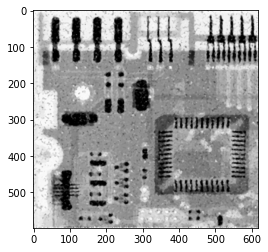

In [7]:
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

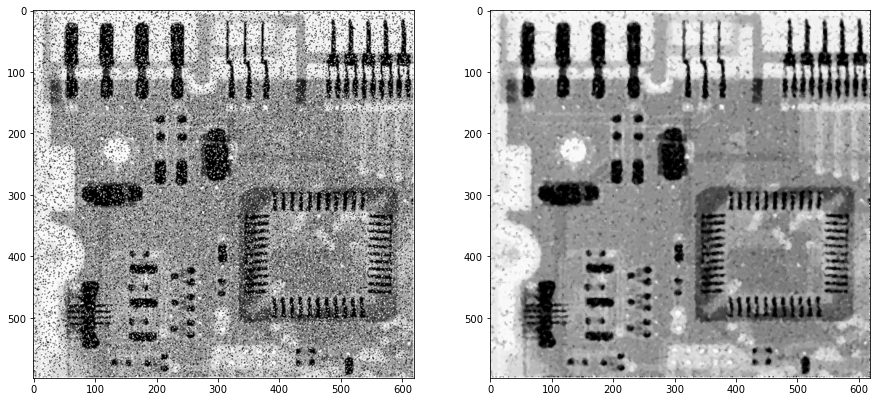

In [8]:
# Side by side comparison

# Plotting the result

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

# display the old image
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))

plt.show(block=True)